<a href="https://colab.research.google.com/github/aguaranguay/se-ales/blob/master/Taller3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller #3**
Alejandro Guaranguay 818037

#**Abrir en Colab, algunas integrales y términos no aparecen en GitHub, por lo que algunos puntos aparecen incompletos**




---



---




#**2. Modelado y Simulación de sistemas en el tiempo** 



##Estudiar y realizar los ejercicios propuestos (si es el caso) en los cuadernos  e Python del repositorio github del curso https://github.com/amalvarezme/ enalesSistemas, sección 3: Sistemas Tiempo, para los siguientes temas: 



---



##1. Respuesta en el tiempo de sistemas lineales e invariantes en el tiempo  ediante ecuaciones diferenciales ordinarias: ver cuadernos Respuesta al  mpulso, Respuesta al escalón. 

###Ejercicio respuesta al impulso



* #### Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?

Se comienza copiando los códigos y luego, restando las señales entre sí



/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


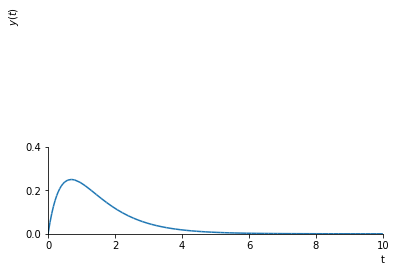

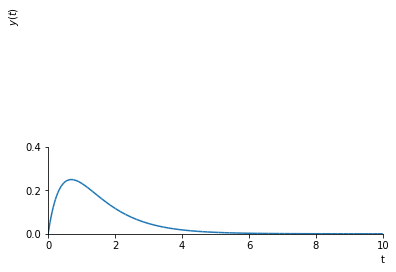

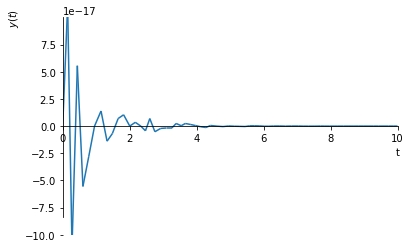

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)


h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
tau = sym.symbols('tau', real=True)
y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))


sym.plot(y1.rhs, (t,0,10), ylabel=r'$y(t)$');
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');
sym.plot((y1.rhs - y2), (t,0,10), ylabel=r'$y(t)$', ylim=[-1e-16,1e-16]);

Al restar las señales, se observa un error bastante pequeño, por lo que se puede decir que las funciones son iguales.

* #### Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.

Se hace el cambio en $x(t)=\delta(t)$ 


$$\frac{d}{dt} y(t)+ y(t) = \delta(t)$$


Aplicando transformada de Laplace:


$$\mathscr{L}(\frac{d}{dt} y(t)+ y(t)) = \mathscr{L}(\delta(t))$$

Con las condiciones iniciales dada la causalidad y la tranformada de un delta:  
$$y(t)\big|_{t=0}=0$$  $$\frac{d}{dt}y(t)\big|_{t=0}=0 $$ 
$$\mathscr{L}(\delta(t)) = 1$$ 

Entonces:


$$sY(s)+Y(s) = 1$$
$$Y(s)(1+s)=1$$
$$Y(s) = \frac{1}{1+s} $$

Aplicando transformada inversa:

$$\mathscr{L}^{-1} = e^{-t}$$
$$h(t) = e^{-t}$$


El resultado es el mismo.

* #### Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

Siendo la integral de convolución: 

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau
\end{equation}

Sustituimos con los valores ya conocidos. $h(t) = e^{-t}$

\begin{equation}
y(t) = \int_{0}^{t} e^{-2\tau} \cdot e^{-(t-\tau)}  \; d\tau \\
y(t) = e^{-t} \int_{0}^{t} e^{-\tau} d\tau\\
y(t) = e^{-t} (-e^{-\tau})\big\vert^{t}_{0} = e^{-t} - e^{-2t}
\end{equation}



---



##2. Relaciones entre respuesta al impulso, funcion de transferencia y  autofunciones: ver cuadernos Autofunciones. 

* ### Introduzca $x(t)=e^{s t} $ y $y(t)=\lambda \cdot e^{st}$ en la EDO y calcule manualmente el valor propio $\lambda$. ¿Cómo se relaciona el resultado con el resultado anterior al resolver la EDO?


Se tiene qué:

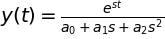

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, s, a0, a1, a2 = sym.symbols('t s a:3')
x = sym.exp(s * t)
y = sym.Function('y')(t)

ode = sym.Eq(a0*y + a1*y.diff(t) + a2*y.diff(t,2), x)
solution = sym.dsolve(ode)
solution.subs({'C1': 0, 'C2' : 0})

Como $y{\left (t \right )} = \frac{e^{s t}}{a_{0} + a_{1} s + a_{2} s^{2}}$, entonces sustituyendo $y(t)=\lambda \cdot e^{st}$

$$\lambda \cdot e^{st} = \frac{e^{s t}}{a_{0} + a_{1} s + a_{2} s^{2}}$$
$$\lambda  = \frac{1}{a_{0} + a_{1} s + a_{2} s^{2}}$$

El valor propio, está asociado con el polinomio característico de $Y(s)$

* ### Puede generalizar sus resultados a una EDO de orden arbitrario?

Sea una EDO: 

\begin{equation}
a_0 y(t) + a_1 \frac{d y(t)}{dt} +...+ a_n \frac{d^n y(t)}{dt^n} = x(t)
\end{equation}

El valor de $\lambda$ es:

\begin{equation}
\lambda = \frac{1}{a_{0} + a_{1} s +...+ a_{n} s^{n}}
\end{equation}




---



## 3. Ejemplos de modelado de sistemas lineales e invariantes en el tiempo  ediante ecuaciones diferenciales ordinarias: ver cuadernos Red eléctrica, Péndulo eléstico


###Ejercicio 1

* #### Cambie el coeficiente de amortiguamiento $c$ del péndulo elástico e indique cómo cambia la magnitud y la fase de la función de transferencia $H(j\omega)$.

-----------------------------------------------


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


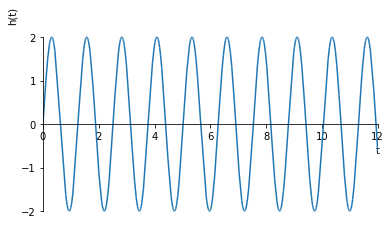

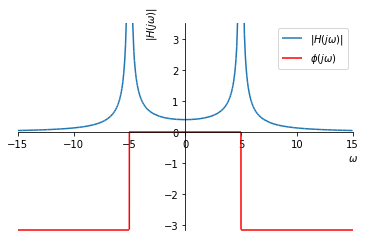

[0, -1.58113883008419*sqrt(10), 1.58113883008419*sqrt(10), zoo, zoo]
-----------------------------------------------


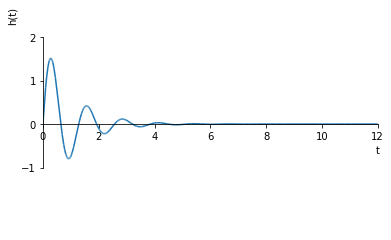

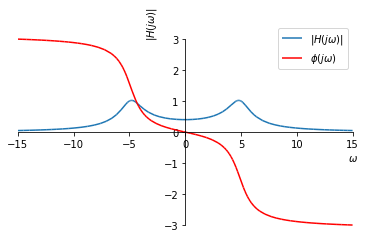

[0, -4.79583152331272, 4.79583152331272, zoo, zoo]
-----------------------------------------------


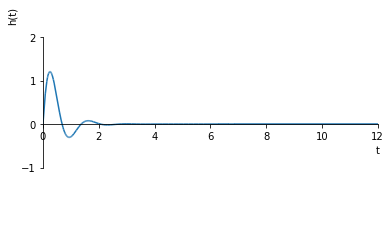

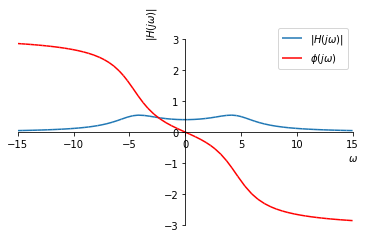

[0, -4.12310562561766, 4.12310562561766, zoo, zoo]
-----------------------------------------------


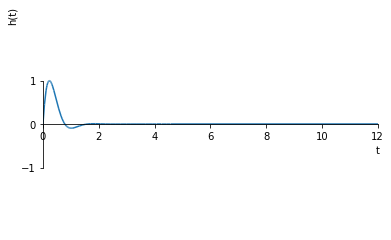

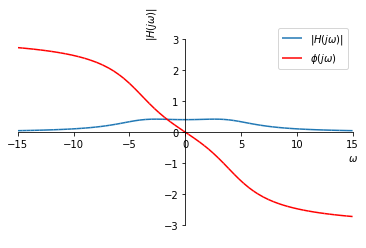

[0, -2.64575131106459, 2.64575131106459, zoo, zoo]
-----------------------------------------------


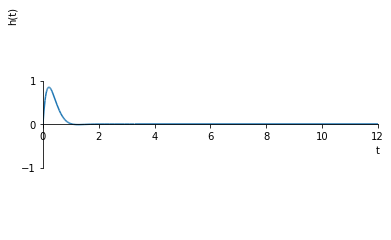

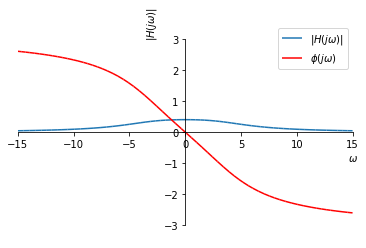

[0, -2.64575131106459*I, 2.64575131106459*I, zoo, zoo]
-----------------------------------------------


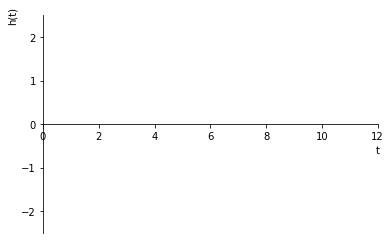

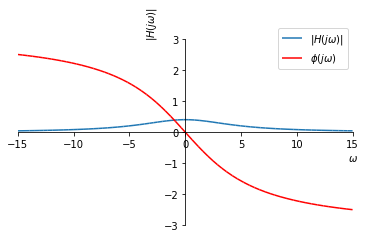

[0, -5.0*I, 5.0*I, zoo, zoo]
-----------------------------------------------


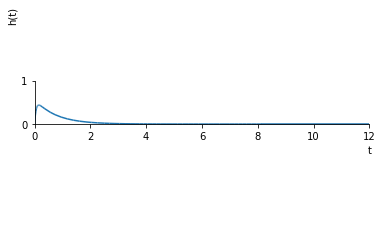

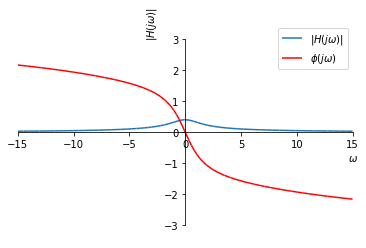

[0, -13.228756555323*I, 13.228756555323*I, zoo, zoo]
-----------------------------------------------


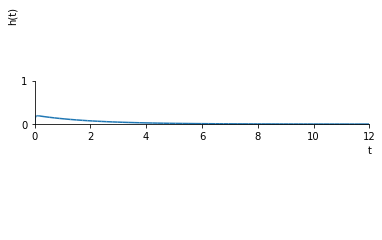

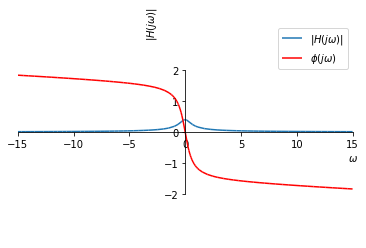

[0, -35.0*I, 35.0*I, zoo, zoo]
-----------------------------------------------


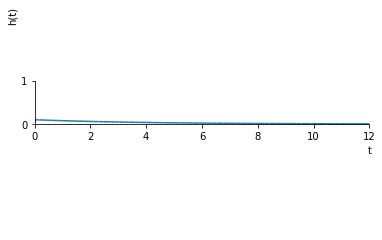

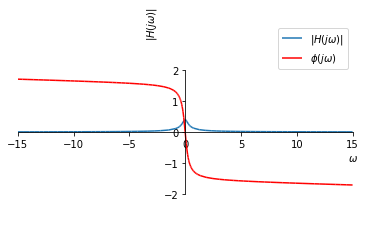

[0, -70.5336798983294*I, 70.5336798983294*I, zoo, zoo]
-----------------------------------------------


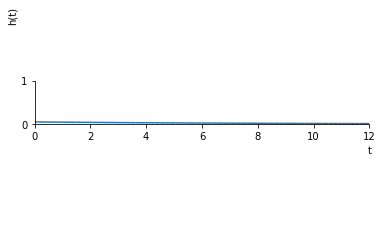

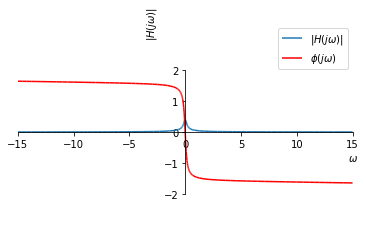

[0, -141.332940251026*I, 141.332940251026*I, zoo, zoo]


In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

sym.init_printing()
t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)


z = sym.Matrix([0,0.2,0.4,0.6,0.8,1,2,5,10,20])
for i in range(0,len(z)):
 
  mck = {m: 0.1, c: z[i], k: sym.Rational('2.5')}

  solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
  integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
  h = solution_h.subs(integration_constants)
  print('-----------------------------------------------')
  sym.plot(h.rhs.subs(mck), (t,0,12), ylim=[-2.5,2.5] ,ylabel=r'h(t)');

  s = sym.symbols('s')
  H = sym.Function('H')(s)
  H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
  w = sym.symbols('omega', real=True)
  Hjw = H.subs(s, sym.I * w)
  p1=sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylim=[-3.5,3.5],ylabel=r'$|H(j \omega)|$',legend=True, xlabel=r'$\omega$',show=False);
  p1[0].label = '$|H(j \omega)|$'   
  extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
  w0 = extrema[1:3]
  [w00.subs(mck) for w00 in w0]
  phi = sym.arg(Hjw)
  p2=sym.plot(phi.subs(mck), (w, -15, 15), ylim=[-3.1,3.1],ylabel=r'$\varphi(j \omega)$', legend=True, xlabel=r'$\omega$',show=False,line_color = 'r')
  p2[0].label = '$\phi (j \omega)$'
  p1.extend(p2)

  p1.show()
  extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
  w0 = extrema
  a=[w00.subs(mck) for w00 in w0]
  a= sym.simplify(a)
  print(a)


Al modificar el valor del coeficiente de amortiguamiento cambia la función de transferencia a su vez que cambien las frecuencias de resonancia haciendo que el mismo cambie entre sus estados de amortiguamiento(sistema oscilatorio, subamortiguado, sobreamortiguado, amortiguado crítico), tal como se observa en la simulación al aumentar este coeficiente. Se nota en las frecuencias de resonancias que al disminuir el coeficiente de amortiguiamiento las demás frecuencias se atenuan más rápido, mientras que las frecuencias de resonancia se pronuncian más. Para la fase de la función de transferencia, se observa como el ángulo disminuye en las frecuencias de resonancia al disminuir el coeficiente de amortiguamiento y como crece esta de manera lineal al aumentarla.


* #### Qué relación hay entre la frecuencia de oscilación y las frecuencias de resonancia?

Las frecuencias de resonancia son los valores donde la función de transferencia llega a su máximo, y éstas frecuencias son cercanas a la frecuencia natural de sistema.

###Ejercicio 2

* #### Calcule y grafique el desplazamiento para valores dados de $m_\text{I}$ y $r$.

------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


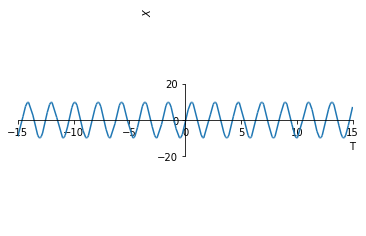

m1 = 2, w1 = 3, w2 = 2, r = 2
------------------------------------------------


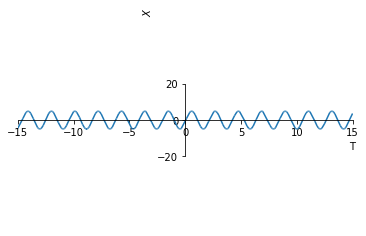

m1 = 2, w1 = 3, w2 = 1, r = 4
------------------------------------------------


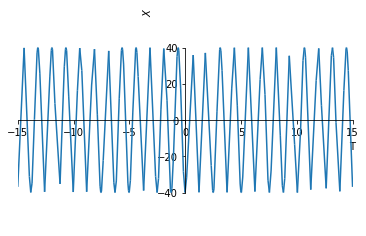

m1 = 1, w1 = 5, w2 = 2, r = 5
------------------------------------------------


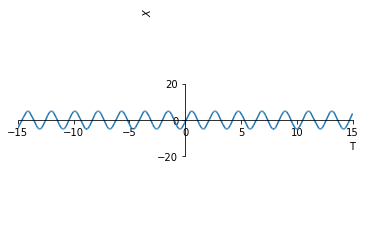

m1 = 4, w1 = 3, w2 = 1, r = 2
------------------------------------------------


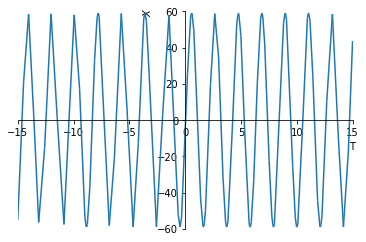

m1 = 2, w1 = 3, w2 = 4, r = 3


In [ ]:
%matplotlib inline
import sympy as sym
from random import randint

t, m, c, k, m1, r, w2, w1 = sym.symbols('t m c k m1 r w2 w1', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
mck = {m: 0.1, c: sym.Rational('0.1'), k: sym.Rational('2.5')}
s = sym.symbols('s')
H = sym.Function('H')(s)
H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
w = sym.symbols('omega', real=True)
Hjw = H.subs(s, sym.I * w)

for i in range(0,5):
  print('------------------------------------------------')
  m1 =randint(1, 5)
  r = randint(1, 5)
  w2 =randint(1, 5)
  w1 =randint(1, 5)
  F0 = m1*r*w2**2
  Hjw1 = Hjw.subs(mck)
  y = F0*sym.im(sym.exp(sym.I*w*t)*Hjw1)   
  sym.plot(y.subs(w,w1), (t, -15, 15), ylabel=r'$X$', xlabel=r'T',ylim=[-60,60]);

  print('m1 = '+str(m1) + ', w1 = '+str(w1)+ ', w2 = '+str(w2)+', r = '+str(r))

* #### ¿Para qué frecuencias angulares $\omega$ se tiene una mayor magnitud del desplazamiento? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t)$ y el desplazamiento $y(t)$ en estas frecuencias?

Las mayor magnitud de desplazamiento se encuentra en el valor máximo de la amplitud, donde la amplitud de la función es:

$$A = F_0 \cdot \Im{(H(j \omega))}$$
$$A = \frac{m_\text{I} r \omega_{2}^2 }{i c \omega + k - m \omega^{2}}$$

Como se hizo en el cuaderno, para hallar estas magnitudes hay que derivar la función con valor absoluto, e igualar a cero para hallar esos máximos

------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


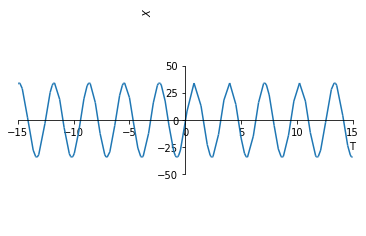

m1 = 2, w1 = 2, w2 = 3, r = 4
[-4.94974746830583, 4.94974746830583]
------------------------------------------------


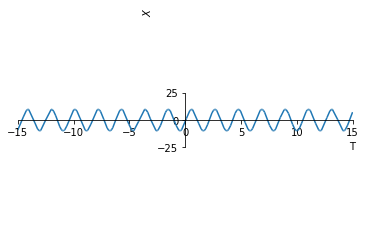

m1 = 4, w1 = 3, w2 = 2, r = 1
[-4.94974746830583, 4.94974746830583]
------------------------------------------------


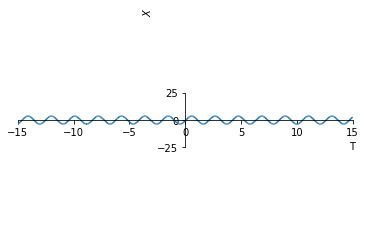

m1 = 3, w1 = 3, w2 = 1, r = 2
[-4.94974746830583, 4.94974746830583]
------------------------------------------------


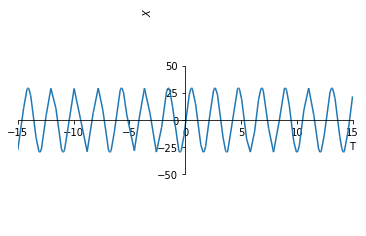

m1 = 1, w1 = 3, w2 = 4, r = 3
[-4.94974746830583, 4.94974746830583]
------------------------------------------------


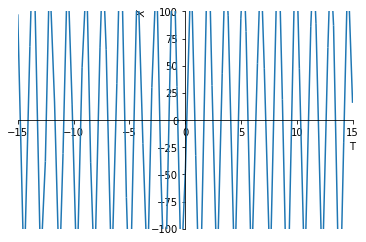

m1 = 3, w1 = 4, w2 = 4, r = 3
[-4.94974746830583, 4.94974746830583]


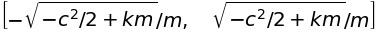

In [ ]:
m1, r,w2= sym.symbols('m1 r w2', real=True)
F0 = m1*r*w2**2
a = abs(F0*(Hjw))
extrema = sym.solve(sym.Eq(sym.diff(a, w),0),w)
w0 = extrema[1:3]

for i in range(0,5):
  print('------------------------------------------------')
  m1 =randint(1, 5)
  r = randint(1, 5)
  w2 =randint(1, 5)
  w1 =randint(1, 5)
  F0 = m1*r*w2**2
  Hjw1 = Hjw.subs(mck)
  y = F0*sym.im(sym.exp(sym.I*w*t)*Hjw1)   
  sym.plot(y.subs(w,w1), (t, -15, 15), ylabel=r'$X$', xlabel=r'T',ylim=[-100,100]);
  print('m1 = '+str(m1) + ', w1 = '+str(w1)+ ', w2 = '+str(w2)+', r = '+str(r))
  a = ([(w00.subs(mck)).evalf() for w00 in w0])
  print(a)
w0

Gráfica de la relación entre la fase de $F_{0}$ y $y(t)$ 

------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


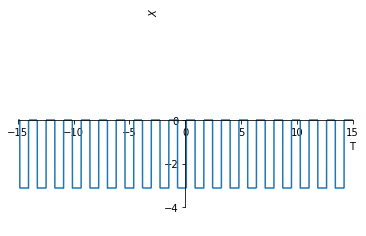

El valor máximo de la amplitud sera cuando w1=4.94974746830583
------------------------------------------------


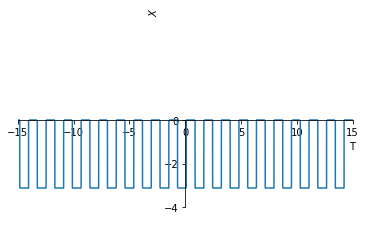

El valor máximo de la amplitud sera cuando w1=4.94974746830583
------------------------------------------------


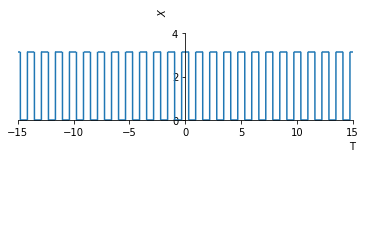

El valor máximo de la amplitud sera cuando w1=4.94974746830583
------------------------------------------------


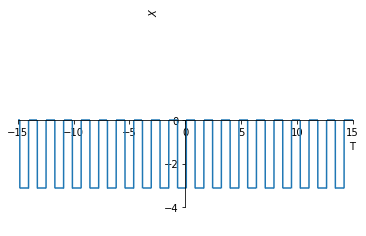

El valor máximo de la amplitud sera cuando w1=4.94974746830583
------------------------------------------------


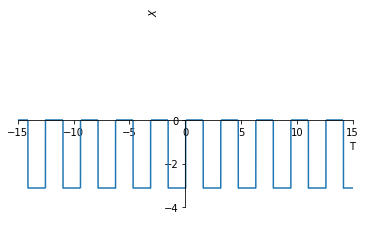

El valor máximo de la amplitud sera cuando w1=4.94974746830583


In [ ]:
for i in range(0,5):
  print('------------------------------------------------')
  m1 =randint(1, 5)
  r = randint(1, 5)
  w2 =randint(1, 5)
  w1 =randint(1, 5)
  F0 = m1*r*w2**2
  Hjw1 = Hjw.subs(mck)
  y = F0*sym.im(sym.exp(sym.I*w*t)*Hjw1)
  a = [(w00.subs(mck)).evalf() for w00 in w0]
  sym.plot(sym.arg(F0/y.subs(w,w1)), (t, -15, 15), ylabel=r'$X$', xlabel=r'T', ylim=[-5,5]);
  print("El valor máximo de la amplitud sera cuando w1=" + str(a[1]))


*  #### ¿Cómo deben elegirse las frecuencias de resonancia $\omega_0$ del péndulo de resorte para obtener un buen aislamiento de vibraciones para una máquina que gira con frecuencia angular $\omega$? ¿Cómo es la relación de fase entre la fuerza externa $F_\text{E}(t) $ y el desplazamiento $y(t)$ a esta frecuencia?

Para aislar el sistema, se necesita que el deplazamiento sea el menor posible.Como se vió anteriormente la magnitud del desplazamiento es mínimo cuando la frecuencia de la función de transferencia es cercana a cero, entonces si se ajustan éstos valores cuando la función de transferencia se acerca a cero, la relación entre la fase de la fuerza y el desplazamiento es igual siempre. 



---



---



# **3. Transformada de Laplace**

## Para resolver los siguientes ejercicios puede apoyarse de los cuadernos del repositorio github del curso, sección 4: Transformada de Laplace.



---



## **1. Demuestre las siguientes propiedades (sin utilizar tablas de propiedades):**

**i) $\mathcal{L}\{x(t-t_o)\}=e^{-st_o}X(s)$**

**ii) $\mathcal{L}\{x(at)\}=\frac{1}{|a|}X(\frac{s}{a})$**

**iii) $\mathcal{L}\{\frac{dx(t)}{dt}\}=sX(s)$**

**iv) $\mathcal{L}\{x(t)*y(t)\}=X(s)Y(s)$**


###$\Rightarrow$ Solución


Se tiene que: $$\mathcal{L}\{x(t)\}=\int_{0}^{\infty}x(t)e^{-st}dt$$


###i) $\mathcal{L}\{x(t-t_o)\}=e^{-st_o}X(s)$

Se plantea la integral

$$ \mathcal{L}\{x(t-t_o)\}=\int_{0}^{\infty}x(t-t_{o})e^{-st}dt $$

Haciendo un cambio de variable:

$$u=t-t_o$$   $$t=u+t_{o}$$

Y cambiando los limites $t\rightarrow \infty = u\rightarrow \infty$ y $t\rightarrow 0 = u\rightarrow -t_o$. Se tiene que:

\begin{equation}
e^{-st_o}\int_{-t_o}^{\infty}x(u)e^{-su}du=e^{-st_o}X(s)
\end{equation}



###ii) $\mathcal{L}\{x(at)\}=\frac{1}{|a|}X(\frac{s}{a})$

Se plantea la integral

$$ \mathcal{L}\{x(at)\}=\int_{0}^{\infty}e^{-st}x(at)dt $$

Haciendo un cambio de variable: $$u=at$$  $$ dt= \frac{du}{a}$$

Y cambiando los limites $t\rightarrow \infty = u\rightarrow \infty$ y $t\rightarrow 0 = u\rightarrow 0$. Se tiene que:

$$ \mathcal{L}\{x(at)\}=\frac{1}{a}\int_{0}^{\infty}e^{-s\frac{u}{a}}x(u)du=\frac{1}{a}X\Big(\frac{s}{a}\Big)
$$

###iii) $\mathcal{L}\{\frac{dx(t)}{dt}\}=sX(s)$

Se plantea la integral:

$$\mathcal{L}\Big\{ \frac{dx(t)}{dt}\Big\}=\int_{0}^{\infty} \frac{dx(t)}{dt} e^{-st}dt$$

Con integracion por partes

$$u=e^{-st}$$   $$du=-se^{-st}$$ 


$$dv=x'(t)$$    $$v=x(t)$$

Se tiene que:

$$ \mathcal{L}\Big\{ \frac{dx(t)}{dt}\Big\} = e^{-st}x(t)\Big|_{0}^{\infty}+s \int_{0}^{\infty} e^{-st} x(t) dt = -x(0)+s\mathcal{L}\{x(t)\} $$

$$ \mathcal{L}\Big\{ \frac{dx(t)}{dt}\Big\}=sX(s)-x(o) $$

Tendiendo en cuenta condiciones iniciales cero

$$ \mathcal{L}\Big\{ \frac{dx(t)}{dt}\Big\}=sX(s) $$



### iv) $\mathcal{L}\{x(t)*y(t)\}=X(s)Y(s)$

Se plantea la integral:

$$  \mathcal{L}\{x(t)*y(t)\} = \int_{0}^{\infty}(x(t)* y(t))e^{-st}dt$$

Se sabe que la convolución es:

$$ x(t)* y(t)=\int_{0}^{t}x(\tau)y(t-\tau)d\tau$$

Entonces:
$$\mathcal{L}\{x(t)*y(t)\} = \int_{0}^{\infty}\Big(\int_{0}^{t}x(\tau)y(t-\tau)d\tau \Big)e^{-st}dt = \int_{0}^{\infty}\int_{0}^{t}x(\tau)y(t-\tau)e^{-st}d\tau dt $$

Por teorema de fubini se va a intercambiar el orden de las integrales

Entonces se tiene que:

$$ 0< t <\infty $$
$$ 0< \tau <t $$

Viendo los límites de la integral geométricamente

![texto alternativo](https://drive.google.com/uc?export=view&id=1EvCIoW3NjQ7elV77afga7XM-TC0XckWy)

Se tiene que ahora la integral se rescribe de la siguiente manera:

$$\mathcal{L}\{x(t)*y(t)\} =  \int_{0}^{\infty}\int_{\tau}^{\infty}x(\tau)y(t-\tau)e^{-st} dt d\tau  $$

Haciendo un cambio de variable: $$u=t -\tau$$ $$t =u +\tau$$  $$ dt= du$$

Y cambiando los limites $t\rightarrow \infty = u\rightarrow \infty$ y $t\rightarrow \tau = u\rightarrow 0$. Se tiene que:

$$\mathcal{L}\{x(t)*y(t)\} =  \int_{0}^{\infty}\int_{0}^{\infty}x(\tau)y(u)e^{-s(u +\tau)}  d\tau du = \int_{0}^{\infty}\int_{0}^{\infty}x(\tau)y(u)e^{-su}  e^{-s\tau}  d\tau du $$

Separando las integrales en productos de integrales:

$$\mathcal{L}\{x(t)*y(t)\} = \int_{0}^{\infty} x(\tau)e^{-s\tau}d\tau \int_{0}^{\infty}y(u)e^{-su}     du = X(s)Y(s)$$






---


## **2. Encuentre la transformada de Laplace y dibuje el esquema de polos y ceros la región de convergencia (ROC), de las siguientes señales:**

**i) $e^{-2t}u(t)+e^{-3t}u(t)$**

**ii) $e^{2t}u(t)+e^{-3t}u(-t)$**

**iii)$e^{-a|t|}$**

**iv)$e^{-2t}[u(t)-u(t-5)]$**



###i) $e^{-2t}u(t)+e^{-3t}u(t)$

Se halla la transformada de laplace de: $$\mathcal{L}\{ e^{-2t}u(t)\}+ \mathcal{L}\{e^{-3t}u(t)\}$$



*   $\mathcal{L}\{ e^{-2t}u(t)\}$
    
   $$\mathcal{L}\{ e^{-2t}u(t)\} = \frac{1}{s+2}$$


*   $\mathcal{L}\{e^{-3t}u(t)\}$

  $$ \mathcal{L} \{e^{-3t}u(t)\} =\frac{1}{s+3} $$

Entonces:

$$ \mathcal{L}\{ e^{-2t}u(t)\}+ \mathcal{L}\{e^{-3t}u(t)\} = \frac{1}{s+2}+  \frac{1}{s+3} =  \frac{2s+5}{(s+2)(s+3)}  $$



*   Polos:$-2$, $-3$
*   Ceros:$-\frac{5}{2}$



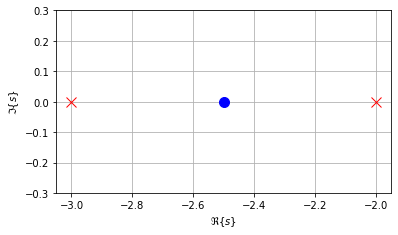

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)

X = (2*s+5)/((s + 2)*(s+3))

poles = sym.roots(sym.denom(X), s)
zeros = sym.roots(sym.numer(X), s)

import matplotlib.pyplot as plt

def pole_zero_plot(poles, zeros, ax=None):
    
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
    
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.ylim(-.3,.3)
    plt.autoscale(axis= 'x')
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()
    plt.show()


pole_zero_plot(poles, zeros)

###ii) $e^{2t}u(t)+e^{-3t}u(-t)$

Se halla la transformada de laplace de: $$\mathcal{L}\{ e^{-2t}u(t)\}+ \mathcal{L}\{e^{-3t}u(-t)\}$$



*   $\mathcal{L}\{ e^{-2t}u(t)\}$
    
   $$\mathcal{L}\{ e^{-2t}u(t)\} = \frac{1}{s+2}$$


*   $\mathcal{L}\{e^{-3t}u(-t)\}$

  $$ \mathcal{L} \{e^{-3t}u(-t)\}= \mathcal{L} \{e^{-3t}[1- u(t)]\}= \mathcal{L} \{e^{-3t}- e^{-3t}u(t)\} = \mathcal{L} \{e^{-3t} \} - \mathcal{L} \{e^{-3t}u(t)\} =\frac{1}{s+3}-\frac{1}{s+3}=0 $$

Entonces:

$$ \mathcal{L}\{ e^{-2t}u(t)\}+ \mathcal{L}\{e^{-3t}u(-t)\} = \frac{1}{s+2} $$



*   Polos: -2
*   Ceros: No

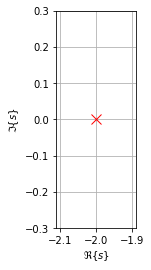

In [ ]:
s = sym.symbols('s', complex=True)

X = 1/(s + 2)

poles = sym.roots(sym.denom(X), s)
zeros = sym.roots(sym.numer(X), s)

pole_zero_plot(poles, zeros)

###iii)$e^{-a|t|}$



Con $a>0$

$$\mathcal{L}\{e^{-a|t|}\}= \frac{1}{s+a} $$

*   Polos: -a
*   Ceros: No

Con $ a < 0 $

$$\mathcal{L}\{e^{-a|t|}\}= \frac{1}{s-a} $$

*   Polos: a
*   Ceros: No

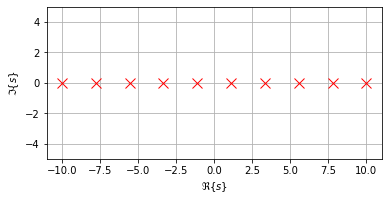

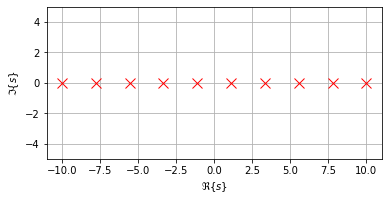

In [ ]:
%matplotlib inline
import sympy as sym
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
a = np.linspace(-10,10,10)#Se hace un vector
a2 = -a

def pole_zero_plot(poles, zeros, ax=None):
    
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
    
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.ylim(-5,5)
    plt.autoscale(axis= 'x')
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()
    plt.show()

pole_zero_plot(a, [])

pole_zero_plot(a2, [])

###iv)$e^{-2t}[u(t)-u(t-5)]$

Se halla la transformada de laplace de: 

$$\mathcal{L}\{ e^{-2t}[u(t)-u(t-5)] \} = \mathcal{L}\{ e^{-2t}u(t)- e^{-2t}u(t-5) \} = \mathcal{L}\{ e^{-2t}u(t)\}- \mathcal{L}\{e^{-2t}u(t-5) \} $$



*   $\mathcal{L}\{ e^{-2t}u(t)\}$
    
   $$\mathcal{L}\{ e^{-2t}u(t)\} = \frac{1}{s+2}$$


*   $\mathcal{L}\{e^{-2t}u(t-5) \}$

Por tablas se sabe qué: 

$$ \mathcal{L}\{e^{-at}u(t+b) \} = \frac{e^{b(s+a)}}{s+a} $$

Entonces:

  $$ \mathcal{L}\{e^{-2t}u(t-5) \} = \frac{e^{-5(s+2)}}{s+2} $$

Entonces:

$$ \mathcal{L}\{ e^{-2t}u(t)\}- \mathcal{L}\{e^{-2t}u(t-5) \}  = \frac{1}{s+2} - \frac{e^{-5(s+2)}}{s+2} = \frac{1-e^{-5(s+2)}}{s+2} $$



*   Polos: -2
*   Ceros: -2

[-2, log(exp(-2)/(-1/4 + sqrt(5)/4 - I*sqrt(sqrt(5)/8 + 5/8))), log(exp(-2)/(-1/4 + sqrt(5)/4 + I*sqrt(sqrt(5)/8 + 5/8))), log(exp(-2)/(-sqrt(5)/4 - 1/4 - I*sqrt(-sqrt(5)/8 + 5/8))), log(exp(-2)/(-sqrt(5)/4 - 1/4 + I*sqrt(-sqrt(5)/8 + 5/8)))]


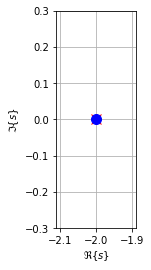

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)

X = (1-sym.exp(-5*(s+2)))/(s+2)

poles = sym.roots(sym.denom(X), s)
zeros = sym.solve(sym.numer(X), s)


def pole_zero_plot(poles, zeros, ax=None):
    
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
    
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.ylim(-.3,.3)
    plt.autoscale(axis= 'x')
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()
    plt.show()

pole_zero_plot(poles, zeros)



---


## **3. Encuentre la función de transferencia en lazo abierto para un circuito  RLC serie (entrada tensión de alimentación - salida tensión en el capacitor) un circuito RCL en paralelo (entrada tensión de alimentación -  salida corriente en el inductor). Nota: tenga en cuenta las condiciones  iniciales del sistema según lo explicado en los cuadernos de Python de la  sección 4 del repositorio del curso.**

### Circuito Serie RLC

 

Se sabe que:

$$ i(t)=i_R(t)=i_L(t)=i_C(t) $$
$$i(t)=i_C(t)=C\frac{dv_C(t)}{dt}$$  
$$ v_R(t) = i_C(t)R= RC\frac{dv_C(t)}{dt}$$
$$v_L(t)=L\frac{di(t)}{dt}=LC\dfrac{d^2v_C(t)}{dt^{2}}$$

Entonces:

$$ v_C(t) +RC v_C' (t)+LC v_C''(t) = x(t) $$ 

Para mejor entendimiento se sustituye: $$v_C(t)=y(t)$$$$RC=b$$ $$LC=a$$

Entonces:

$$ ay''(t) +b y'(t) + y(t) = x(t) $$

Aplicando Transformada de Laplace:

$$ \mathcal{L}\{ ay''(t) +b y'(t) + y(t) \} = \mathcal{L}\{x(t)\} $$



$$ a\mathcal{L}\{ y''(t)\} +b\mathcal{L}\{ y'(t)\} + \mathcal{L}\{y(t) \} = \mathcal{L}\{x(t)\} $$

$$ a[s^2Y(s)-sy(0)-y'(0)] +b[sY(s)-y(0)] + Y(s) = X(s) $$

Teniendo en cuenta las condiciones iniciales para el voltaje en el capacitor impuestas en el repositorio de GitHub:

$$ v_C(0)=y(0)=-1 $$
$$ v_C'(0)=y'(0)=0 $$

Entonces:

$$ a[s^2Y(s)+s] +b[sY(s)+1] + Y(s) = X(s) $$
$$ as^2Y(s)+as +bsY(s)+b + Y(s) = X(s) $$
$$ Y(s)[as^2+bs+1] = X(s)-as-b $$
$$ Y(s) = \frac{X(s)}{as^2+bs+1}-\frac{as+b}{as^2+bs+1} $$

Entonces $Y(s)$:

$$ Y(s) = \frac{X(s)-LCs-RC}{LCs^2+RCs+1} $$

$$ Y(s) = \frac{X(s)}{LCs^2+RCs+1}-\frac{LCs+RC}{LCs^2+RCs+1} $$

Donde $Y(s)_{ext}=\frac{X(s)}{LCs^2+RCs+1}$ es la salida que depende de la entrada, y $Y(s)_{int}= -\frac{LCs+RC}{LCs^2+RCs+1}$ es la salida que depende de los valores iniciales.  

Para hallar la función de transferencia dividimos por $X(s)$:



$$ \frac{Y(s)}{X(s)} = \frac{X(s)}{[X(s)][LCs^2+RCs+1]}-\frac{LCs+RC}{[X(s)][LCs^2+RCs+1]} $$

$$ \frac{Y(s)}{X(s)} = \frac{1}{LCs^2+RCs+1}-\frac{LCs+RC}{[X(s)][LCs^2+RCs+1]} $$

$$H(s) =  -\frac{LCs+RC-X(s)}{[X(s)][LCs^2+RCs+1]} $$


###Circuito Paralelo RLC

Se sabe que:


$$ v(t)=v_R(t)=v_L(t)=v_C(t) $$
$$v_L(t)=L\frac{di_L(t)}{dt}$$  

Entonces:

$$ L i_L' (t) = v_L(t) $$ 

Para mejor entendimiento se sustituye: $$i_L(t)=y(t)$$ $$ v_L(t) = x(t) $$ $$L=a$$ 

Entonces:

$$ ay'(t)  = x(t) $$

Aplicando Transformada de Laplace:

$$ \mathcal{L}\{ ay'(t)  \} = \mathcal{L}\{x(t)\} $$



$$ a\mathcal{L}\{ y'(t)\}  = \mathcal{L}\{x(t)\} $$

$$ a[sY(s)-y(0)] = X(s) $$

Teniendo en cuenta las condiciones iniciales para la corriente en el inductor impuestas en el repositorio de GitHub:

$$ i_L(0)=y(0)=0 $$


Entonces:

$$ asY(s) = X(s) $$

$$ Y(s) = \frac{X(s)}{as} $$

Entonces $Y(s)$:

$$ Y(s) = \frac{X(s)}{Ls} $$

Para hallar la función de transferencia dividimos por $X(s)$;

$$ \frac{Y(s)}{X(s)} = \frac{1}{Ls} $$



$$H(s) = \frac{1}{Ls} $$




---



## **4. Para las funciones de transferencia encontradas en el punto anterior encuentre la expresión de la salida en el tiempo, en función de R, L, C, y las condiciones iniciales, para las siguientes entradas:** 

###i) Impulso 

###ii) Escalón unitario 

###iii) Rampa. 

###Compruebe los resultados en simulación sobre python (utililzando sympy) y grafique la se˜nal de salida para cada caso.

###Circuito Serie RLC

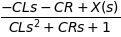

In [88]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

a=C*L
b=C*R

Y = (X-a*s-b)/(a*s**2+b*s+1)
Yint=(-a*s-b)/(a*s**2+b*s+1)
Yext=X/(a*s**2+b*s+1)
Y

####i) Impulso 

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


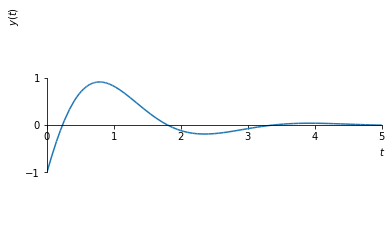

In [52]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
def pltys (RLC,x,Y):
  y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, x), s, t)
  sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$',ylim=[-2.3,2.3],adaptative = False);
  y=y.simplify()
    
  return y

xim=1 #Transformada impulso
pltys(RLC,xim,Y)


####i) Escalón unitario

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


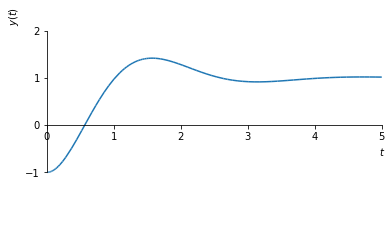

In [89]:
xes=1/s #transformada escalón
pltys(RLC,xes,Y)

####i) Rampa

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


TypeError: ignored

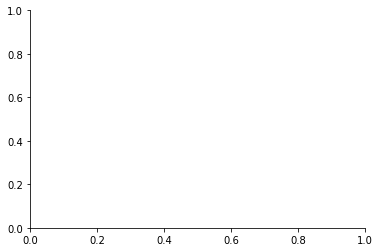

In [107]:
xes=1/s**2 #transformada escalón
pltys(RLC,xes,Y)

Sympy no resuelve la transformada inversa cuando la entrada es una rampa.

###Circuito Paralelo RLC

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = (X)/(L*s)
Y

####i) Impulso 

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


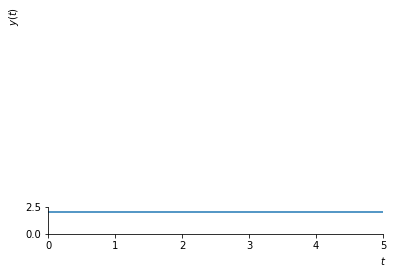

In [ ]:
def pltys (RLC,x,Y):
  y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, x), s, t)
  sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$',ylim=[0,20],adaptative = False);
  y=y.simplify()
    
  return y

xim=1 #Transformada impulso
pltys(RLC,xim,Y)

####i) Escalón unitario

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


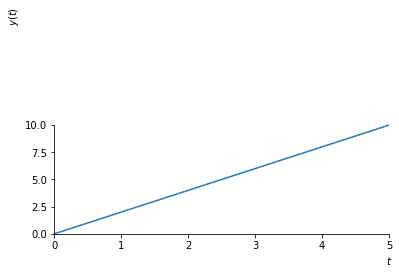

In [ ]:
xes=1/s #transformada escalón
pltys(RLC,xes,Y)

####i) Rampa

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


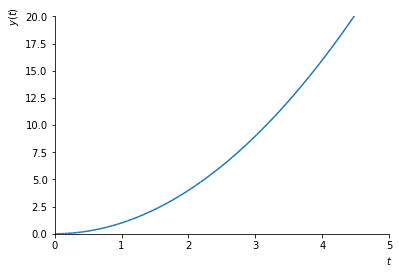

In [ ]:
xra=1/s**2
pltys(RLC,xra,Y)



---



## **5. Consulte en qué consiste un sistema subamortiguado, sobreamortiguado,y de amortiguamiento crítico. Genere simulaciones para ejemplificar cada uno de los casos con los sistemas R,L,C serie y paralelo estudiados. Nota: asuma condiciones iniciales cero.**



1.   La ecuación característica del circuito Serie RLC estudiado es:




$$LCs^2+RCs+1=0$$

Se encuentran las raíces de la ecuación característica mediante el uso de la fórmula cuadrática:

$$s=\frac{-RC\pm\sqrt{(RC)^2-4(LC)}}{2LC}$$

Para mejor entendimiento se hace: $\alpha = \frac{R}{2L}; \omega_o=\frac{1}{\sqrt{LC}}$

$$s = -\alpha\pm\sqrt{\alpha^2-\omega_o^2}$$

Entonces:

* $\alpha >\omega_o \Rightarrow$ La respuesta de $i(t)$ son	2 exponenciales decrecientes, 2 raíces reales. El sistema es Sobreamortiguado. 

* $\alpha =\omega_o \Rightarrow$ La respuesta de $i(t)$ es $t \cdot \text{exponencial decreciente}$, 2 raíces repetidas. El sistema es Críticamente amortiguado.

* $\alpha >\omega_o \Rightarrow$ La respuesta de $i(t)$ es Seno decreciente,	2 raíces complejas. El sistema es Subamortiguado.

SOBRE AMORTIGUADO:

Se dice que el circuito está sobreamortiguado porque las dos exponenciales superpuestas están llevando la corriente a cero. Un circuito estará sobreamortiguado si la resistencia es alta en relación a la frecuencia de resonancia.

CRITICAMENTE AMORTIGUADO:

En un sistema críticamente amortiguado, el sistema se encuentra en un estado estático.

SUBAMORTIGUADO:

En un sistema subamortiguado se presenta una oscilación variante de la corriente hasta el punto en que se llevara a cero.




Sistema sobre amortiguado


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


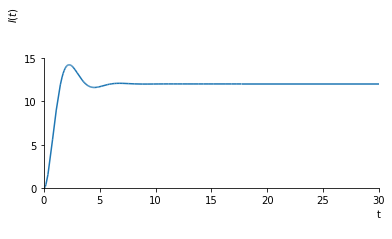

Sistema subamortiguado


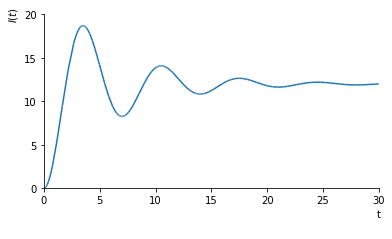

Sistema criticamente amortiguado


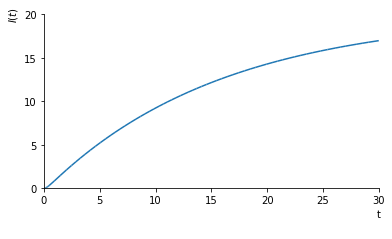

In [ ]:
from random import randint

def RLCSerie(R,L,C,V):
    a,w, t=sym.symbols('a,w, t', real=True)
    i=sym.Function('i')(t)
    ode=sym.Eq(i.diff(t,2)+(R/L)*i.diff(t)+(1/L*C)*i,V)
    w=1/sym.sqrt(L*C)
    a=R/(2*L)    
    soeq= sym.dsolve(ode)
    ic=sym.solve((soeq.rhs.limit(t,0,'-'), soeq.rhs.diff(t).limit(t,0,'-')),['C1','C2'])
    it = soeq.subs(ic)
    if a > w:
        print("Sistema sobre amortiguado")
    if a == w:
        print("Sistema criticamente amortiguado")
    if a < w :
        print("Sistema subamortiguado")
    sym.plot((it.rhs), (t,0,30), ylabel=r'$I(t)$',ylim=[-5,20])
    
 
V = 30
R = 3
L = 2
C = 5
RLCSerie(R,L,C,V)

V = 10
R = 2
L = 6
C = 5
RLCSerie(R,L,C,V)


V = 5
R = 4
L = 1
C = 1/4
RLCSerie(R,L,C,V)








---


## **6. Para los sistemas del punto 3 encuentre las expresiones para el factor de amortiguamiento $\xi$; la frecuencia natural no amortiguada $\omega_n$, y la frecuencia naturual amortiguada $\omega_d$ en función de R, L, y C. Nota: asuma condiciones iniciales cero.**


Se sabe que:

$$ i(t)=i_R(t)=i_L(t)=i_C(t) $$
$$i(t)=i_C(t)=C\frac{dv_C(t)}{dt}$$  
$$ v_R(t) = i_C(t)R= RC\frac{dv_C(t)}{dt}$$
$$v_L(t)=L\frac{di(t)}{dt}=LC\dfrac{d^2v_C(t)}{dt^{2}}$$

Entonces:

$$ v_C(t) +RC v_C' (t)+LC v_C''(t) = x(t) $$ 

Para mejor entendimiento se sustituye: 
$$v_C(t)=y(t) $$ 
$$ 1 = a_0 $$ 
$$RC=a_1$$ 
$$LC=a_2$$

Entonces:

$$ a_2y''(t) +a_1 y'(t) + a_0 y(t) = x(t) $$

Aplicando Transformada de Laplace:

$$ \mathcal{L}\{ a_2y''(t) +a_1 y'(t) + a_0y(t) \} = \mathcal{L}\{x(t)\} $$



$$ a_2\mathcal{L}\{ y''(t)\} +a_1\mathcal{L}\{ y'(t)\} + a_0\mathcal{L}\{y(t) \} = \mathcal{L}\{x(t)\} $$

 

Teniendo en cuenta las condiciones iniciales:

$$ v_C(0)=y(0)=0 $$
$$ v_C'(0)=y'(0)=0 $$

Entonces:

$$ a_2[s^2Y(s)] +a_1[sY(s)] + a_0Y(s) = X(s) $$
$$ a_2s^2Y(s) +a_1sY(s) + a_0Y(s) = X(s) $$
$$ Y(s) = \frac{X(s)}{a_2s^2+a_1s+a_0} $$
$$ H(s) = \frac{1}{a_2s^2+a_1s+a_0} $$

Se sabe que:

$$ H(s) = k\frac{\omega_n^2}{s^2+2\xi \omega_n s+\omega_n^2} $$

Donde:

*   $$ \Rightarrow k=\frac{1}{a_0}$$
*   $$ \Rightarrow \omega_n^2= \frac{a_0}{a_2}$$
*   $$ \Rightarrow \xi= \frac{a_1}{2\sqrt{a_0a_2}}$$
*   $$ \Rightarrow 2\xi \omega_n = \frac{a_1}{a_2}$$

Entonces:

*   $$ \Rightarrow k=\frac{1}{1}= 1$$
*   $$ \Rightarrow \omega_n^2= \frac{1}{LC}$$
*   $$ \Rightarrow \xi= \frac{RC}{2\sqrt{(1)(LC)}}= \frac{RC}{2\sqrt{LC}} $$
*   $$ \Rightarrow 2\xi \omega_n = \frac{RC}{LC}$$

Entonces la función de transferencia es:

$$ H(s) = (1)\frac{\frac{1}{LC}}{s^2+\frac{RC}{LC}s+\frac{1}{LC}} $$

$$ H(s) = \frac{\frac{1}{LC}}{s^2+\frac{RC}{LC}s+\frac{1}{LC}} $$





---



---

# **4. Transformada Z**


##Para resolver los siguientes ejercicios puede apoyarse de los cuadernos del repositorio github del curso, sección 5: Transformada Z.



---



## **1. Consulte en qué consiste la transformada Z. Explique las semejanzas y diferencias entre la serie de Fourier, transformada de Fourier en tiempo continuo y discreto, transformada de Laplace y la transformada Z.**

###Similitudes y diferencias

 
* La transformada de Laplace es una generalización de la Transformada de Fourier de Tiempo-Continuo. Sin embargo, en lugar de usar funciones senosoidales complejas de la forma $e^{j\omega t}$, como lo hace la CTFT, la transformada de Laplace utilizauna forma más generalizada, $e^{st}$, donde $s = σ + j\omega$.
 
* La relación entre las dos es que Laplace trabaja en todo el plano complejo, mientrasque Fourier "recorre" el eje imaginario. Es decir, la transformada de Fourier se obtiene reemplazando:
$$s=j\omega$$ 
En la transformada de Laplace, donde "$s$" es la variable de Laplace, "$\omega$" es lafrecuencia angular y "$j$" al cuadrado es "$-1$".La transformada de Fourier se utiliza, por ejemplo, para ver el espectro de señales y la transformada de Laplace para analizar estabilidad de sistemas.


* Las transformadas de Laplace rara vez se resuelven mediante integración (si no por medio de tablas y uso de computadoras (por ejemplo Matlab) es más comun).
 
* La transformada de Fourier se emplea con señales aperiódicas a diferencia de la serie de Fourier.

 
* La transformación de Laplace es de amplia aplicación en el campo de la electrónica y l teoría de circuitos. Por otra parte, la transformada de Fourier, esde amplia aplicación en el análisis de señales, así como en diferentes campos dela física (teoría de la difracción, mecánica cuántica, etc).


*   La serie de Fourier es una expansión de una señal periódica como una suma discreta de exponenciales complejas, mientras que la transformada de Fourier es una suma infinita (integral) en el cual se involucra el proceso reconstrucción de una señal en el dominio del tiempo al dominio de la frecuencia.


*   Las series de Fourier descomponen una señal periódica en una suma de senos y cosenos complejos con diferentes frecuencias y amplitudes dictaminadas por un $c_n$ como coeficiente de cada uno de dichos sumandos, mientras que la transformada de Fourier es una operación matemática que rompe una señal en sus frecuencias constituyentes.

*   La transformada y serie de Fourier están pensadas para lo mismo, representar una señal del mundo real por medio de euler complejos, de un dominio a otro


*   La Transformada de Fourier viene dada por La serie de Fourier cuando se aplica el límite cuando $T$ tiende al infinito, y se hace un cambio de variable relacionado con los coeficientes $c_n$ mencionados anteriormente, para que la frecuencia discreta en la Serie, se convierta en continua para la transformada.

*   Para la Serie de Fourier se tiene que calcular $c_n$ para poder reconstruir una señal, mientras que en la Transformada de Fourier no se requiere hallar este $c_n$ puesto a que está comprendido dentro de la misma.

*   La serie de Fourier está definida únicamente para señales periódicas en un intérvalo de timpo finito mientras que la transformada de Fourier se puede aplicarse a señales aperiódicas en un intervalo de timpo infinito (que ocurren sin periodicidad).

*  La DFT y la IDFT permiten representar una señal $x[n]$ o un sistema LTI en uno u otro dominio sin perdida de información.

  Dominio:

$$ \text{Tiempo Discreto}\rightarrow\text{Frecuencia Discreta} $$
$$x[n]\rightarrow X[k]$$

*   La DFT e IDFT representan una secuencia finita periódica dentro de una señal no periódica $x[n]$.

*    La similitud entre la DFT y la serie discreta de Fourier puede interpretarse de dos formas. Si la señal $x[n]$ es realmente periódica la DFT proporciona una nueva forma de las series discretas de Fourier; pero si x[n] es no periódica, y solamente es tratada como periódica a efecto de cálculos computacionales, la DFT.

*   La serie de Fourier va de tiempo contínuo a frecuencia discreta, mientras que la transformada de Fourier va de tiempo contínuo a una frecuencia contínua, esto es:

  $t \in \{ -T/2,T/2 \}\rightarrow n\in \mathbb{Z}$

  $t \in \{ -\infty,\infty \}\rightarrow \omega\in \{-\infty,\infty\}$

* La Transformada Z convierte una señal real o compleja definida en el dominio del tiempo discreto en una representación en el dominio de la frecuencia compleja.

* La transformada Z puede ser unilateral o bilateral y cumple las mismas propiedades que la transformada de Laplace.



---



## **2. Encuentra la transformada Z para las siguientes señales:**

**i) $x[n]=-a^{n}u[-n-1]$**

**ii) $x[n]=a^{n}$ para $0\leq n \leq N-1$ y $a>0$**

**iii) $x[n]=\{5,3,-2_{\dagger}, 0, 4, -3\}$, donde $n=0$ para $x[n]_{\dagger}$**

###i) $x[n]=-a^{n}u[-n-1]$ 

Se plantea la sumatoria

$$ X[z]=\sum_{k=-\infty}^{\infty}x[k]z^{-k} = \sum_{k=-\infty}^{-1}-a^{k}z^{-k}=-\sum_{k=-\infty}^{-1}a^{k}z^{-k}=-\sum_{k=-\infty}^{-1}(az^{-1})^{k} $$

La sumatoria se puede resolver con la serie geométrica:

\begin{equation}
\sum_{k=a}^{b}r^{k}=\frac{r^{a}-r^{b+1}}{1-r}
\end{equation}

Con $r\neq 1$, entonces:

$$  X[z] =-\sum_{k=-\infty}^{-1}\Big(\frac{a}{z}\Big)^{k}=-\frac{(\frac{a}{z})^{-\infty}-(\frac{a}{z})^{-1+1}}{1-az^{-1}}=-\frac{(\frac{z}{a})^{\infty}-(\frac{a}{z})^{0}}{1-az^{-1}}=-\frac{(0)-(1)}{1-az^{-1}}=\frac{1}{1-az^{-1}} $$



$$X(z)=\frac{z}{z-a}$$


###ii) $x[n]=a^{n}$ para $0\leq n \leq N-1$ y $a>0$ 



Se plantea la sumatoria

$$ X[k]= \sum_{k=-\infty}^{\infty}x[k]z^{-k}= \sum_{k=0}^{N-1}a^kz^{-k} = \sum_{k=0}^{N-1}(az^{-1})^k $$

La sumatoria se puede resolver con la serie geométrica:

 $$\sum_{k=0}^{N-1}Cr^k = \frac{C(1-r^N)}{1-r}$$

 $$ X[k]=\sum_{k=0}^{N-1}\Big(\frac{a}{z}\Big)^k = \frac{(1)(1-\Big(\frac{a}{z}\Big)^N)}{1-\Big(\frac{a}{z}\Big)}= \frac{1-\Big(\frac{a}{z}\Big)^N}{1-\Big(\frac{a}{z}\Big)} $$

$$ X[k]= \frac{z-a^Nz^{1-N}}{z-a}$$

###iii) $x[n]=\{5,3,-2_{\dagger}, 0, 4, -3\}$, donde $n=0$ para $x[n]_{\dagger}$

Se plantea la sumatoria

$$ X[k]= \sum_{k=-\infty}^{\infty}x[k]z^{-k}= \sum_{k=-2}^{3} x[k]z^{-k}$$

$$ X[k]= 5z^{-(-2)}+3z^{-(-1)}-2z^{-(0)}+0z^{-(1)}+4z^{-(2)}-3z^{-(3)} $$
$$ X[k]= 5z^2+3z-2+4z^{-2}-3z^{-3} $$



---



## **3. Consulte en qué consisten los filtros de respuesta impulso finita  (Finite impulse response - FIR), y los filtros de respuesta impulso infinita (infinite impulse response - IIR). Realice un paralelo entre los FIR, IIR y los sistemas con y sin realimentación.**

###FIR:

Se trata de un tipo de filtros digitales cuya respuesta a una señal impulso como entrada tendrá un número finito de términos no nulos. 

Para obtener la salida solo se basan en entradas actuales y anteriores. Su expresión en el dominio $n$ es:

$$y_{n}=\sum _{k=0}^{N-1}b_{k}x_{n-k}$$ 

En la expresión anterior $N-1$ es el orden del filtro. $N$ es el número de términos no nulos y el número de coeficientes del filtro. Los coeficientes son  $b_{k}$.

La salida también puede expresarse como la convolución de la señal de entrada $x(n)$ con la respuesta al impulso $h(n):

$$y_{n}=\sum _{k=0}^{N-1}h_{k}x_{n-k}$$

Aplicando la transformada Z a la expresión anterior:

$H(z)=\sum _{k=0}^{N-1}h_{k}z^{-k}=h_{0}+h_{1}z^{-1}+\cdots +h_{N-1}z^{-(N-1)}$

* Estructura

  La estructura básica de un FIR es: 

![texto alternativo](https://drive.google.com/uc?export=view&id=1McB9a6sRRoUQnUNyeKh9L09xOyVS1ogB)

En la figura los términos $h(n)$ son los coeficientes y los T son retardos.

* Polos y ceros:

  Estos filtros tienen todos los polos en el origen, por lo que son estables. Los ceros se presentan en pares de recíprocos si el filtro se diseña para tener fase lineal. 

* Características

  Los filtros FIR tienen la gran ventaja de que pueden diseñarse para ser de fase lineal, lo cual hace que presenten ciertas propiedades en la simetría de los coeficientes. Este tipo de filtros tiene especial interés en aplicaciones de audio. Además son siempre estables.

  Por el contrario también tienen la desventaja de necesitar un orden mayor respecto a los filtros IIR para cumplir las mismas características. Esto se traduce en un mayor gasto computacional. 

##IIR

Se trata de un tipo de filtros digitales en el que, como su nombre indica, si la entrada es una señal impulso, la salida tendrá un número infinito de términos no nulos, es decir, nunca vuelve al reposo. 

La salida de los filtros IIR depende de las entradas actuales y pasadas, y además de las salidas en instantes anteriores. Esto se consigue mediante el uso de realimentación de la salida.

$$y_{n}=b_{0}x_{n}+b_{1}x_{n-1}+\cdots +b_{N}x_{n-N}-a_{1}y_{n-1}-a_{2}y_{n-2}-\cdots -a_{M}y_{n-M}$$

donde los a y b son los coeficientes del filtro. El orden es el máximo entre los valores de M y N, que son los términos que determinan la cantidad de polos y ceros en la función de transferencia.

Aplicando la transformada Z a la expresión anterior:

$$H(z)={\frac {\sum _{k=0}^{N}b_{k}z^{-k}}{1+\sum _{k=1}^{M}a_{k}z^{-k}}}$$

La diferencia entre los filtros IIR y FIR es que los filtros FIR son de respuesta impulsiva finita y los IIR de respuesta impulsiva infinita. Podemos agregar que los filtros FIR no son recurrentes y los IIR sí lo son. 

* Estructura

  Hay numerosas formas de implementar los filtros IIR. La estructura afecta a las características finales que presentará el filtro como la estabilidad. Otros parámetros a tener en cuenta a la hora de elegir una estructura es el gasto computacional que presenta. 

![texto alternativo](https://drive.google.com/uc?export=view&id=1egwPjFqhqmRHkxyFu5oGY2Ur-xzlEfL4)


* Polos y ceros

  Este tipo de filtros presenta polos y ceros que determina la estabilidad y la causalidad del sistema.

  Cuando todos los ceros y polos están en el interior de la circunferencia unidad se dice que es fase mínima y el sistema es estable y causal. Si todos los ceros están en el exterior es fase máxima.

  Si algún polo está fuera de la circunferencia unidad el sistema es inestable.

* Características

  Las principales diferencias respecto a los filtros FIR es que los IIR pueden cumplir las mismas exigencias que los anteriores pero con menos orden de filtro. Esto es importante a la hora de implementar el filtro, pues presenta una menor carga computacional.

  Este tipo de filtros pueden ser inestables, aun cuando se diseñen para ser estables.

  En principio no pueden diseñarse para tener fase lineal pero se pueden aplicar algunas técnicas como el filtrado bidireccional para lograrlo.  



---



## **4. Ecualizador de audio. Implemente en python un ecualizador de audio para archivos mp3 utilizando filtros IIR. El usuario podrá ingresar la url del archivo y escoger las bandas y ganancias de ecualización, visualizar el espectro del audio original y filtrado, y descargar los audios en mp3.**

In [40]:
! pip install youtube-dl

!pip install soundfile

In [43]:
from scipy.signal import lfilter
from scipy.signal import ellip
from scipy import fft, arange
from IPython.display import Audio
import soundfile as sf 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import wavfile
import os

def Fourier(x, sf):

    x = x - np.average(x)  ## Se centra

    n = len(x)
    print(n)
    k = arange(n)
    tarr = n / float(sf)
    frqarr = k / float(tarr)  # dos lados del rango de frecuencia

    frqarr = frqarr[range(n // 2)]  # un lado del rango de frecuencia

    x = np.fft.fft(x) / n  # Se hace la transformada y se normaliza
    x = x[range(n // 2)]

    return frqarr, abs(x)

def filtrado(Link,Frecuencia,Atenuacion,Filtro):
 link=Link
 ! youtube-dl --extract-audio -o "audio2.%(mp3)s" --audio-format mp3  {link}  &> /dev/null

 !ffmpeg -i audio2.mp3 -y output2.wav  &> /dev/null
 nombre_out = "output2.wav"
 x, fs = sf.read(nombre_out)
 x2 = x.copy()
 ti = 63
 tf = ti + 15
 xs = x2[int(ti*fs):int((tf*fs)),:]
 K= int(len(xs)/2) + 1
 print("Muestra audio original:")
 display(Audio([xs[:,1], xs[:,0]],rate=fs)) #segmento de audio
 filtro = Filtro
 N = 6
 frec = Frecuencia

 ripple_pass = 2
 ripple_stop = Atenuacion
 num, den = ellip(N, rp=ripple_pass, rs=ripple_stop, Wn=frec, btype=filtro, fs=fs) 
 xf = lfilter(num, den, xs, axis=0)
 

 y = x[:, 0]
 y2 = xf[:, 0]
 fr1, X1 = Fourier(y, fs)
 fr2, X2 = Fourier(y2, fs)
 print("Espectro audio original:")
 plt.title("Espectro")
 plt.xlabel('Freq (Hz)')
 plt.ylabel('|X(freq)|')
 plt.tight_layout()
 plt.plot(fr1, X1, 'b')
 plt.show()
 print("Espectro audio Filtrado:")
 plt.title("Espectro")
 plt.plot(fr2, X2, 'r')
 plt.xlabel('Freq (Hz)')
 plt.ylabel('|X(freq)|')
 plt.tight_layout()
 plt.show()
 
 
 print("Muestra audio filtrado:")
 display(Audio([xf[:,1], xf[:,0]],rate=fs)) #Resultado 
 sf.write('audio_filtrado.wav', xf, fs)
 !ffmpeg -i audio_filtrado.wav -y audio_filtrado.mp3  &> /dev/null
 print("El audio filtrado está en la parte izquierda de Colab en MP3 con el nombre de: auidio_filtrado.mp3")

Ingrese Link de Youtube: https://www.youtube.com/watch?v=Ywq6FMLbWH4
Ingrese Frecuencia de Crítica: 5000
Ingrese Atenuación:50
Ingrse tipo de filtro(1 para filtro pasabaja, 2 para filtro pasaalto): 2
Muestra audio original:


11097965


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


720000
Espectro audio original:


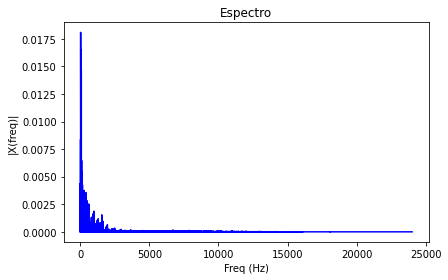

Espectro audio Filtrado:


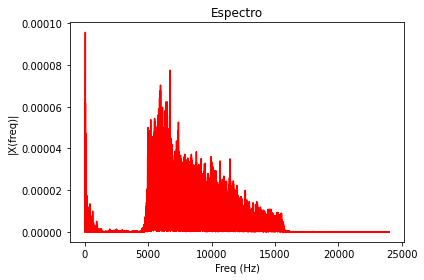

Muestra audio filtrado:


El audio filtrado está en la parte izquierda de Colab en MP3 con el nombre de: auidio_filtrado.mp3


In [44]:
l = input('Ingrese Link de Youtube: ')
f = int(input('Ingrese Frecuencia de Crítica: '))
at = int(input('Ingrese Atenuación:'))
fil = int(input('Ingrse tipo de filtro(1 para filtro pasabaja, 2 para filtro pasaalto): '))
if fil==1 and at>2:
  tf="lowpass"
  filtrado(l,f,at,tf)
elif fil==2 and at>2:
  tf="highpass"
  filtrado(l,f,at,tf)
else:
  print('Error en la entrada de datos')




